# Assignment 5B- Hasanat Hasan

## Problem 1 (100 points): Anharmonic Oscillator.
#### Consider the Schrodinger equation for a particle of mass m in the anharmonic potential $V(x) = V_0 \frac{ x^4 }{ a^4 }$
#### where $V_0$ and $a$ are constant. For simplicity, in this exercise $\frac{V_0}{a^4} = 1/2$.
$$
\vdots
$$

## Converting to two 1st order DEs
#### $\psi$ is $L_2$ integrable, thus it is well behaved and decays at $x = \pm \infty$. Therefore the boundary conditions are:
$$
 \psi(x \rightarrow \pm \infty) = 0
$$
#### Reformulating as two 1st order DEs:
$$
-\frac{1}{2}\frac{d^2\psi}{dx^2} + V(x)\psi(x) = E\psi(x)
$$
$$
\frac{d^2\psi}{dx^2}  = -2E\psi(x) + 2V(x)\psi(x)
$$

#### Redefining the following:
$$
\frac{d\psi}{dx} = \phi, \frac{d\phi}{dx} = -2E\psi(x) + 2V(x)\psi(x) = 2 \left( V(x) - E \right)\psi(x)
$$
#### The shooting method can approximate one 2nd order BVP using 2 IVPs. Our Initial conditions: $\psi(-Na) = 0$ and $\frac{d\psi}{dx} = \alpha$. Lets define: $f(E_0) = \psi_{RK4}(Na) - \psi(Na)$ which is obtained from RK4. Then define 
$$
f(E_0) = \psi_{RK4}(Na) - \psi(Na) = 0\\
f(E_0) =  \psi_{RK4}(Na) = 0
$$
#### we want to find the $E_0$ such that $f(E_0) = 0$

#### a) (30 points) Use Simpson’s method to calculate the relevant numerical integral in the WKB formula
$$
B = \int_{-1}^{1} ds \sqrt{1-s^4}
$$
#### and obtain the corresponding WKB approximations to the eigenvalues:
$$
E_n \sim \frac{1}{2} \left( \pi \frac{n +1/2}{\int_{-1}^{1}dx\sqrt{1-s^4}} \right)^{4/3}, n\in \mathbb{N}
$$


# Utilities Cell

In [12]:
import matplotlib.pyplot as plt
import numpy as np

def WKB_integrand(s: float):
    return np.sqrt(1-s**4)
    
def simpson_integral_approx(integrand ,start_point: float, end_point: float, slices: int)->float:
    ''' 
    using simpsons approximation for the integrand in 2a:

    parameters:
    ----------
    integrand: function. input function to approximate the integral

    start_point: float. starting point in its interval of integration

    end_point: end point of the interval of integration

    slices: int. number of subdivsions to use for the approximation

    returns:
    --------
    integral: float
    '''
    # Check that the number of slices is even
    assert slices % 2 == 0, f"The number of slices must be even. Got {slices}." 

    # initializing f(a) and f(b), and height of trapezoid:
    f_a = integrand(start_point)
    # print(f"{f_a = }") 
    f_b = integrand(end_point)
    # print(f"{f_b = }")
    interval = end_point - start_point
    height = interval / slices
    
    # calculating the terms of the intergal approximation:
    integral_term1 = (height/3) * ( f_a + f_b )
    
    # second term with summation
    integral_term2 = 0
    for idx in range(1,(int(slices/2) + 1)):
        integral_term2 += (height/3) * 4 * (integrand( start_point + height * (2*idx -1)))
    
    # thrid term with summation
    integral_term3 = 0
    for idx in range(1,(int(slices/2))):
        integral_term3 += (height/3) * 2 * (integrand( start_point + 2*idx*height ))
    
    # approximation with simpsons rule:
    integral = integral_term1+integral_term2+integral_term3
    return integral

def trapez_approx(start_val, end_val, function_vals):
    # using the trapezoidal rule: 
    # I(a,b) = h( 1/2(f(a) + f(b) ) + \sum_{k=1}^{N-1} f(a+kh) )

    # setting up initial values:
    f_a = start_val # velocity_vals[0] # start point
    f_b = end_val #velocity_vals[-1] # end point
    # total_time = time_vals[-1] - time_vals[0] 
    height = 1
    integral = height * (1/2)*( f_a + f_b)

    for i, value in enumerate(function_vals[:-1]):
        # index = height*(i+1) # height = 1 for our case
        integral +=  height * (value)

    return integral

def wkb_energy(B: float, energy_label: int):
    n = energy_label
    return (1/2) * ( np.pi*(n + 1/2)/(B) )**(4/3)

def calculate_k1(deriv_func, time: float, input: float | np.ndarray, height: float)->float:    
    ''' 
    Calculates k1 = f( t,y(t) )h
    '''
    return deriv_func( input, time) * height

def calculate_k2(deriv_func, time: float, input: float | np.ndarray, height: float, k1: float | np.ndarray)->float:
    ''' 
    Calculates k2 = f( t + h/2, y(t) + k1/2 )h
    '''
    y = input+(k1/2)
    t = time+(height/2) 
    return deriv_func( y, t) * height

def calculate_k3(deriv_func, time: float, input: float | np.ndarray, height: float, k2: float | np.ndarray)->float:
    ''' 
    Calculates k3 = f( t+h/2, y(t)+k2/2 )h
    '''
    y = input+(k2/2)
    t = time+(height/2) 
    return deriv_func( y, t) * height

def calculate_k4(deriv_func, time: float, input: float | np.ndarray, height: float, k3: float | np.ndarray)->float:
    ''' 
    Calculates k4 = f( t+h/2, y(t)+k3/2 )h
    '''
    y = input+(k3)
    t = time+(height) 
    return deriv_func( y, t) * height

def RK4_approx(deriv_func, initial_vector: list | np.ndarray, final_time: float, num_steps: int):

    # initialing variables:
    t_0: float = initial_vector[0] 
    step_size: float = (final_time-t_0)/num_steps
    t_array: np.ndarray  = np.arange(t_0, final_time + step_size, step_size)
    solution_list: list = [initial_vector[1:]] 

    y = np.array(initial_vector[1:])
    for t_i in t_array[:-1]:
        k1 = calculate_k1(deriv_func, t_i, y, step_size)
        k2 = calculate_k2(deriv_func, t_i, y, step_size, k1)
        k3 = calculate_k3(deriv_func, t_i, y, step_size, k2)
        k4 = calculate_k4(deriv_func, t_i, y, step_size, k3)
        y = y + (1/6) * (k1 + 2*k2 + 2*k3 + k4)
        solution_list.append(y)

    return solution_list, t_array

def secant_method(original_func: callable, 
                  initial_vector: np.ndarray, 
                  tolerance: float, 
                  max_iter: int = 1000):

    f = original_func
    x_prev = initial_vector[0]
    x_n = initial_vector[1]
    
    for i in range(max_iter):
        # initializing guesses:
        f_prev = f(x_prev)
        f_n = f(x_n)
        # print(f"f({x_n}) = {f_n},")
        if np.abs(f_n) < tolerance:  # Check for convergence
            print(f"Root found: {x_n} after {i+1} iterations")
            return x_n
        
        # Update step
        x_new = x_n - f_n * (x_n - x_prev) / (f_n - f_prev)

        # Update for next iteration
        x_prev = x_n
        x_n = x_new
    
    print("Method did not converge within the maximum number of iterations.")
    return None


# Part (a) solutions:

In [13]:
# initialize constants
start_i = -1
final_f = 1
slices = 1000

# calculate the B integral:
B = simpson_integral_approx(WKB_integrand, start_i, final_f,slices)

# calculate the WKB approximation of energy:
wkb_approx_energies=[]
for i in range(7):
    energy = wkb_energy(B, i)
    wkb_approx_energies.append(energy)
    print(f"n = {i}, E = {energy}")


n = 0, E = 0.4335822716156243
n = 1, E = 1.8760015347916323
n = 2, E = 3.7070762768407994
n = 3, E = 5.805891333695707
n = 4, E = 8.116987222347813
n = 5, E = 10.607061736666619
n = 6, E = 13.253461457997547


### My implementation found the energies to be:
### n = 0, E = 0.4335822716156243
### n = 1, E = 1.8760015347916323
### n = 2, E = 3.7070762768407994
### n = 3, E = 5.805891333695707
### n = 4, E = 8.116987222347813
### n = 5, E = 10.607061736666619
### n = 6, E = 13.253461457997547

### (b) (50 points) Start from one of the boundaries —in a similar fashion as in the example of theinfinite square well discussed in class.
### Calculate the eigenfunctions and the eigenvalues of the problem for n = 0,1,...,6 (for simplicity, you are not required to normalize the wavefunctions in this exercise)

In [14]:
V_0 = 1
global_a = 2**(1/4)
global_N = 3
global_xi = -global_N*global_a
global_xf =  global_N*global_a
global_init_psi = 0
global_TISE_steps = 100
inital_dpsidx = 1#e-2

def RK4_TISE(guess_energy: float):
    ''' 
    Approximates the eigen energy of the TISE given the harmonic potential: V(x) = V_0 (x/a)^2
    '''
    def local_TISE(phase_vector:np.ndarray, position: float):
        ''' 
        calculates the derivatives of psi:
        d/dx(psi) = phi, d/dx(phi) = 2 (V - E) psi
        '''
        dpsidx = phase_vector[0] # derivative of psi: d/dx(psi)
        psi = phase_vector[1] 
        V = V_0 * position**4/global_a**4 
        dphidx = 2 * (V-guess_energy) * psi #d/dx(phi) = 2 (V - E) psi
        return np.array([dphidx, dpsidx])
    
    params_vector = [global_xi, inital_dpsidx, global_init_psi]

    # Solve using RK4 with TISE_with_energy
    solutions, _ = RK4_approx(local_TISE, params_vector, global_xf, global_TISE_steps)
    
    # Return the value of psi at the boundary (x = global_xf)
    return solutions[-1][1]

# Define initial guesses and tolerance
tol = 1e-4 # if method doesnt converge, lower 
energy_guess_list = [ [0,0.5], [1.5,2.0], [3.3,3.8], [5.0, 6], [7.8, 8.3], [10.4, 10.7], [13.0,13.4] ] # 8.1, 10.6 , 13.2
root_found__energies = []
for idx,energy_guess in enumerate(energy_guess_list):
# Solve the TISE
    energy_root_solution = secant_method(RK4_TISE, energy_guess, tol)
    root_found__energies.append(energy_root_solution)
    print(f"n= {idx}, E = {energy_root_solution}")

Root found: 0.5301809438810997 after 7 iterations
n= 0, E = 0.5301809438810997
Root found: 1.8998433004954542 after 8 iterations
n= 1, E = 1.8998433004954542
Root found: 3.7278972308172538 after 7 iterations
n= 2, E = 3.7278972308172538
Root found: 5.822551223677204 after 8 iterations
n= 3, E = 5.822551223677204
Root found: 8.131390192920488 after 7 iterations
n= 4, E = 8.131390192920488
Root found: 10.62023462350088 after 6 iterations
n= 5, E = 10.62023462350088
Root found: 13.266253272769166 after 6 iterations
n= 6, E = 13.266253272769166


#### (c) (20 points) Compare your numerical energy eigenvalues with the WKB energies and plot the results as a function of the excitation number n. Discuss the agreement as a function of n.


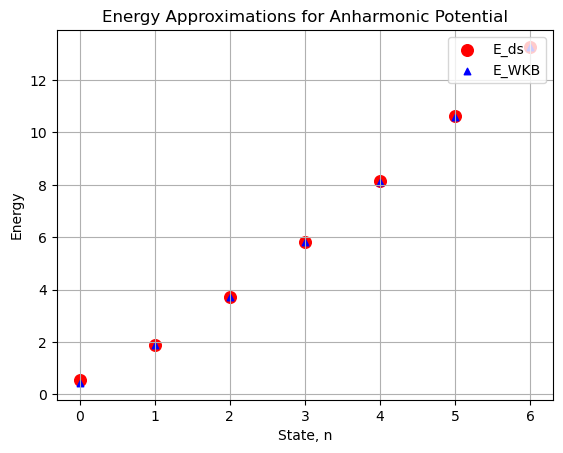

In [ ]:
# plotting the energies from root finding and wkb as a function of n:
n_states = [0,1,2,3,4,5,6]
plt.title("Energy Approximations for Anharmonic Potential")
plt.scatter(n_states, root_found__energies, color='red', label=rf"E_root", s = 70)
plt.scatter(n_states, wkb_approx_energies, color='blue', label=rf"E_WKB", s= 22, marker='^')
plt.xlabel("State, n")
plt.ylabel(rf"Energy")
# plt.xlim(global_xi,global_xf)
plt.legend(loc='upper right')
plt.grid()
plt.show()

### In my results, the RK4 method most disagrees with the WKB approximation for the ground state, for the ground state, WKB predicts $0.4336$ and RK4 predicts $0.53018$